In [1]:
import joblib             as jlb
import matplotlib.pyplot  as plt
import numpy              as np
import pandas             as pd
import seaborn            as sbn
import warnings
warnings.filterwarnings('ignore')

import re
import string

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('tweets.csv')


In [ ]:
folder = "C:\\Users\PC\\OneDrive\\Máy tính\\SCHOOL STUFF\\NLP\\FinaleData\\tweets.csv"
df = pd.read_csv(folder)
df

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


# Cash xử lí

In [3]:
df_ = df.drop_duplicates(subset='id', keep='first')

In [4]:
df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [5]:
empty_location_rows = df[df['location'].isnull()]
empty_location_rows

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
10,10,ablaze,NaN,Images showing the havoc caused by the #Camero...,1
11,11,ablaze,NaN,Social media went bananas after Chuba Hubbard ...,0
...,...,...,...,...,...
11352,11352,wrecked,NaN,Since everyone is talking about Chen and exo o...,0
11354,11354,wrecked,NaN,"Yeah, proper Liverpool fans wrecked Man City’s...",1
11363,11363,wrecked,NaN,He's the oxygen that pumps blood to my living ...,0
11364,11364,wrecked,NaN,Had these guys last game n fcked them. Talked ...,0


Location không liên quan tới disater => drop columns location


In [6]:
df = df.drop('location', axis =1)

In [7]:
df_c = df.copy()

In [8]:
print("Rows with URLs before applying remove_url:")
print(df[df['text'].str.contains(r'https?://\S+|www\.\S+', na=False)]['text'])

Rows with URLs before applying remove_url:
2        Arsonist sets cars ablaze at dealership https:...
3        Arsonist sets cars ablaze at dealership https:...
4        "Lord Jesus, your love brings freedom and pard...
6        Several houses have been set ablaze in Ngemsib...
8        National Security Minister, Kan Dapaah's side ...
                               ...                        
11359    "Trump and Sisi 'rejected foreign exploitation...
11361    he'll be wrecked... if that happens https://t....
11363    He's the oxygen that pumps blood to my living ...
11364    Had these guys last game n fcked them. Talked ...
11367    i feel directly attacked 💀 i consider moonbin ...
Name: text, Length: 5459, dtype: object


In [9]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    result_text = pattern.sub(r'', text)
    return result_text

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if not isinstance(text, str):
        return ""

    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

In [12]:
import string

def remove_punct(text):
    translation_table = str.maketrans('', '', string.punctuation)
    return text.translate(translation_table)

In [13]:
def remove_html(text):
    html_pattern = re.compile(r'<.*?>')
    return html_pattern.sub(r'', text)

In [14]:
def remove_html(text):
    html_pattern = re.compile(r'<.*?>')
    return html_pattern.sub(r'', text)

In [15]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [16]:
def decontraction(text):
    # Contractions with 'not'
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"n\'t", " not", text)

    # Contractions with 'have'
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll've", " will have", text)

    # Other contractions
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    # Specific contractions
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    return text


In [17]:
def separate_alphanumeric(text):
    words = re.findall(r"[^\W\d_]+|\d+", text)
    return " ".join(words)

In [18]:
def cont_rep_char(text):
    repeated_char = text.group(0)

    if len(repeated_char) > 1:
        return repeated_char[0:2]


In [19]:
def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

In [20]:
def preprocess(text):
    text = remove_url(text)
    text= remove_punct(text)
    text = remove_emoji(text)
    text = decontraction(text)
    text = separate_alphanumeric(text)
    text = unique_char(cont_rep_char,text)
    text = remove_stopwords(text)
    return text

In [21]:
df['text'] = df['text'].apply(lambda x : preprocess(x))

In [22]:
df[['text']]

,text
0,Communal violence Bhainsa Telangana Stones pel...
1,Telangana Section 144 imposed Bhainsa January ...
2,Arsonist sets cars ablaze dealership
3,Arsonist sets cars ablaze dealership
4,Lord Jesus love brings freedom pardon Fill Hol...
...,...
11365,Media warned us well advance This wrecked whol...
11366,feel directly attacked consider moonbin amp ji...
11367,feel directly attacked consider moonbin amp ji...
11368,ok remember outcast nd dora au THOSE AU WRECKE...


In [23]:
df['keyword'].unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'bush%20fires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical%20emergency', 'cliff%20fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash',
       'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage',
       'danger', 'dead', 'death', 'deaths', 'debris', 'deluge', 'deluged',
       'demolish', 'demolished', 'demolition', 'derail', 'derailed',
       'derailment', 'desol

# EDA

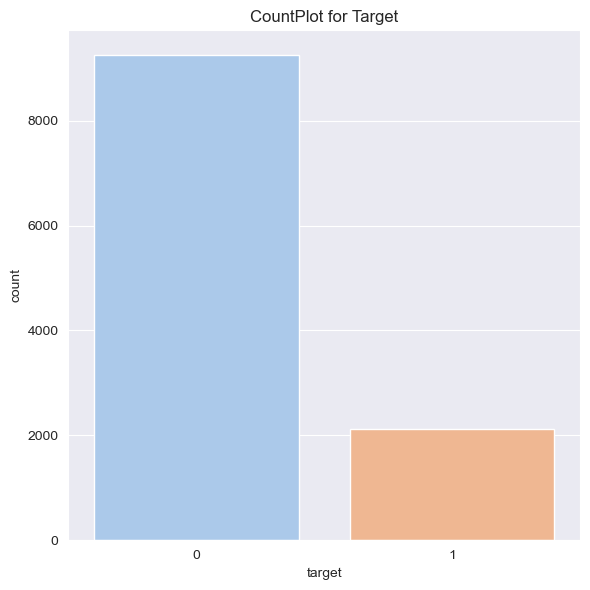

In [ ]:
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
sns.countplot(data=df, x='target',palette='pastel')
plt.title('CountPlot for Target')
plt.tight_layout()
plt.show()

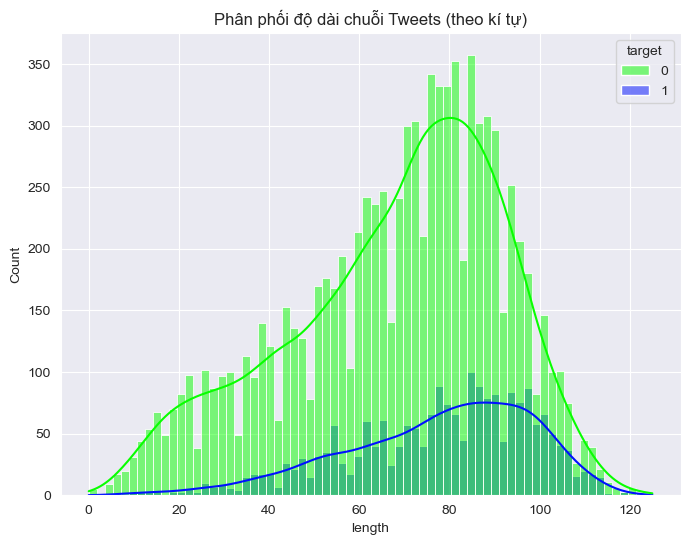

<Figure size 640x480 with 0 Axes>

In [ ]:
df['length'] = df['text'].apply(lambda x: len(x))
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='length',hue='target',palette='hsv',kde= True,bins=70)
plt.title('Phân phối độ dài chuỗi Tweets (theo kí tự)')
plt.show()
plt.tight_layout()

In [ ]:
disaster = ' '.join(df[df['target']==1]['text'])
non_disaster =''.join(df[df['target']==0]['text'])

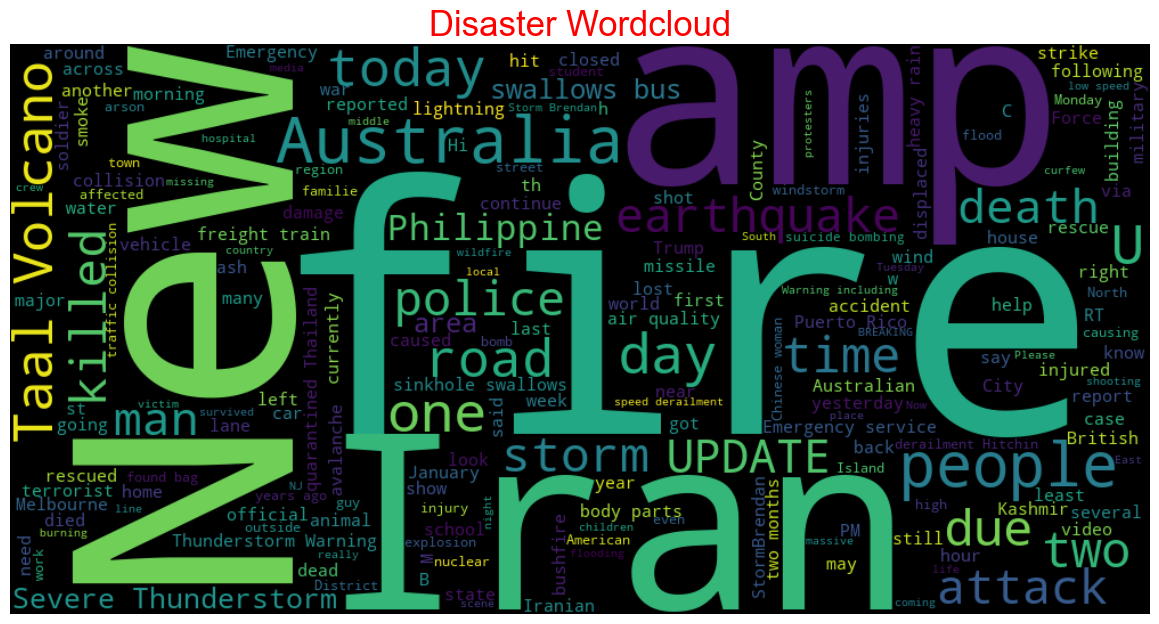

In [ ]:
plt.figure(figsize=(14,6))
wordcloud = WordCloud(width=1000,height=500).generate(disaster)
plt.imshow(wordcloud,interpolation='bilinear',cmap='magma')
plt.axis('off')
plt.tight_layout()
plt.title('Disaster Wordcloud',fontsize= 25,color='Red')
plt.show()

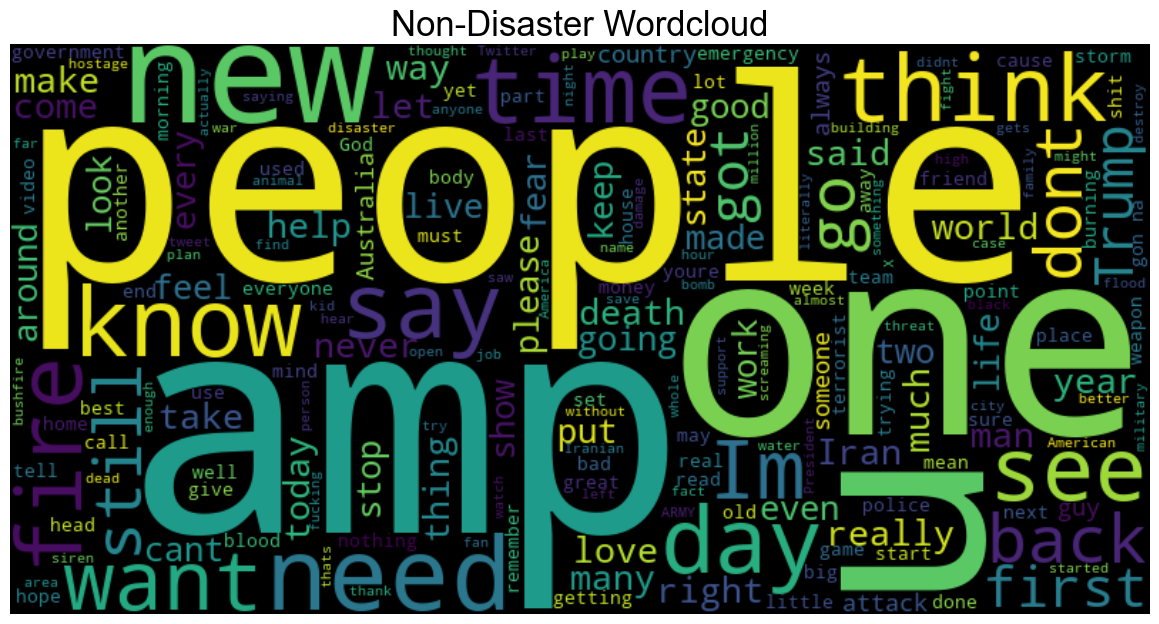

In [ ]:
plt.figure(figsize=(14,6),frameon=True)
wordcloud = WordCloud(width=800,height=400).generate(non_disaster)
plt.imshow(wordcloud,interpolation='bilinear',cmap='Dark2')
plt.axis('off')
plt.tight_layout()
plt.title('Non-Disaster Wordcloud',fontsize= 25,color='Black')
plt.show()

# Undersamping

In [24]:
!pip install imbalanced-learn

In [25]:
from imblearn.under_sampling import RandomUnderSampler

print("Before undersampling:")
print(df['target'].value_counts())

# Tạo một đối tượng RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Undersample dữ liệu
X_resampled, y_resampled = rus.fit_resample(df.drop('target', axis=1), df['target'])

# Tạo dataframe mới từ dữ liệu undersampled
df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df['target'] = y_resampled

# In thông tin về số lượng mẫu sau undersampling
print("\nAfter undersampling:")
print(df['target'].value_counts())

Before undersampling:
0    9256
1    2114
Name: target, dtype: int64

After undersampling:
0    2114
1    2114
Name: target, dtype: int64


In [26]:
X = df['text']
y = df['target']

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [28]:
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [29]:
dense_matrix = X_test_tfidf.todense()

sparsity = 1.0 - np.count_nonzero(dense_matrix) / dense_matrix.size

In [30]:
sparsity

0.9992689547324056

# MODEL TRAINING

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

## MACHINE LEARNING - SVM

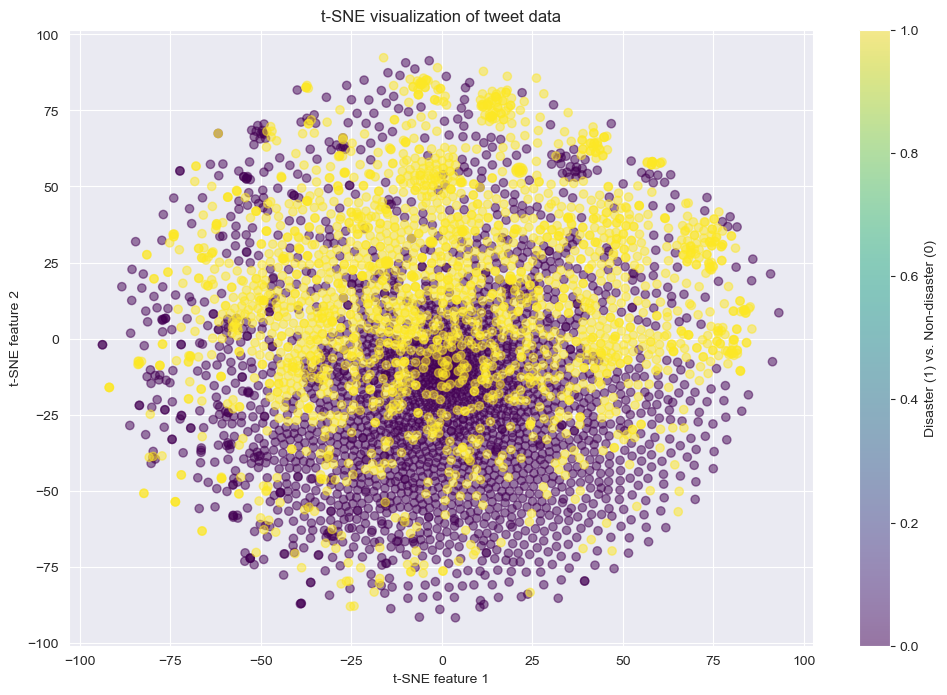

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['target'], alpha=0.5, cmap='viridis')
plt.title('t-SNE visualization of tweet data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(scatter, label='Disaster (1) vs. Non-disaster (0)')
plt.show()

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
}

grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

best_svm_params = grid_search.best_params_
best_svm_score = grid_search.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
print("Accuracy: ", best_svm_params)
print("Best Cross-Validation Score: ", best_svm_score)

Accuracy:  {'C': 10, 'gamma': 1}
Best Cross-Validation Score:  0.8089845559508098


In [ ]:
best_svm_classifier = grid_search.best_estimator_
y_pred_svm = best_svm_classifier.predict(X_test_tfidf)

In [ ]:
print(f"""Điểm chính xác: {accuracy_score(y_test, y_pred_svm)}
\n Report: {classification_report(y_test, y_pred_svm)}""")

Điểm chính xác: 0.8037825059101655

 Report:               precision    recall  f1-score   support

           0       0.80      0.83      0.82       443
           1       0.80      0.78      0.79       403

    accuracy                           0.80       846
   macro avg       0.80      0.80      0.80       846
weighted avg       0.80      0.80      0.80       846



In [ ]:
cm_svm = confusion_matrix(y_test,y_pred_svm)

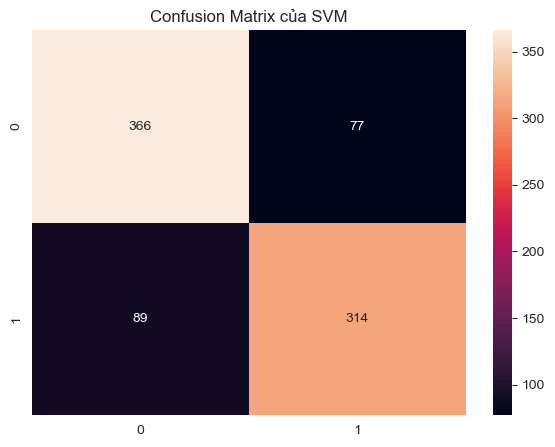

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title('Confusion Matrix của SVM')
plt.show()

## MAXENT - LOGISTIC REGRESSION

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train_tfidf, y_train)

best_lr_params = grid_search.best_params_
best_lr_score = grid_search.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
print(f"Best Parameters: {best_lr_params}")
print("Best Cross-Validation Score: ", best_lr_score)

Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Best Cross-Validation Score:  0.8066216251649726


In [ ]:
best_lr_classifier = grid_search.best_estimator_
y_pred_lr = best_lr_classifier.predict(X_test_tfidf)

In [ ]:
print(f"""Điểm chính xác: {accuracy_score(y_test, y_pred_lr)}
\n Report: {classification_report(y_test, y_pred_lr)}""")

Điểm chính xác: 0.793144208037825

 Report:               precision    recall  f1-score   support

           0       0.80      0.81      0.80       443
           1       0.79      0.78      0.78       403

    accuracy                           0.79       846
   macro avg       0.79      0.79      0.79       846
weighted avg       0.79      0.79      0.79       846



In [ ]:
cm_lr = confusion_matrix(y_test,y_pred_lr)

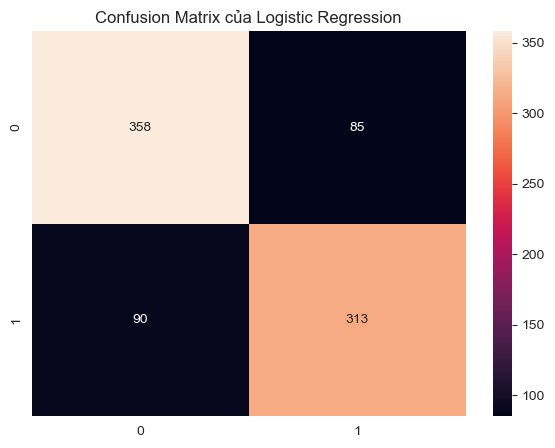

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.title('Confusion Matrix của Logistic Regression')
plt.show()

## DEEP LEARNING - LTSM

In [31]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

from tensorflow.keras.utils import plot_model

from sklearn import metrics
from functools import reduce

In [32]:
max_features=5000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)

In [33]:
tokenizer.sequences_to_texts([[  4208,  778,    5, 1644, 1728, 2120,   66, 4209,   12, 1153,
        740,    6,   78,  740,    6, 1326,   66,  267,  958]])

['snyder massacre amp wicked honestly round could tuesdaythoughts killed told manila fire since manila fire dark could st else']

In [34]:
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =41)

In [35]:
embed_dim = 32
lstm_out = 32
ltsm_model = Sequential()
ltsm_model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
ltsm_model.add(Dropout(0.2))
ltsm_model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
ltsm_model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002)
ltsm_model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(ltsm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 32)            160000    
                                                                 
 dropout (Dropout)           (None, 24, 32)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 168353 (657.63 KB)
Trainable params: 168353 (657.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [36]:
# plot_model(model, to_file='model.png')

In [37]:
ltsm_model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
106/106 [==============================] - 29s 78ms/step - loss: 0.5779 - accuracy: 0.6975 - val_loss: 0.4304 - val_accuracy: 0.8298
Epoch 2/10
106/106 [==============================] - 9s 82ms/step - loss: 0.2936 - accuracy: 0.8859 - val_loss: 0.3964 - val_accuracy: 0.8369
Epoch 3/10
106/106 [==============================] - 8s 73ms/step - loss: 0.1523 - accuracy: 0.9453 - val_loss: 0.5017 - val_accuracy: 0.8191
Epoch 4/10
106/106 [==============================] - 8s 76ms/step - loss: 0.0932 - accuracy: 0.9690 - val_loss: 0.6317 - val_accuracy: 0.8144
Epoch 5/10
106/106 [==============================] - 3s 30ms/step - loss: 0.0574 - accuracy: 0.9811 - val_loss: 0.6801 - val_accuracy: 0.7991
Epoch 6/10
106/106 [==============================] - 3s 29ms/step - loss: 0.0473 - accuracy: 0.9849 - val_loss: 0.8449 - val_accuracy: 0.7908
Epoch 7/10
106/106 [==============================] - 5s 44ms/step - loss: 0.0304 - accuracy: 0.9899 - val_loss: 0.8281 - val_accuracy: 0.801

In [38]:
y_pred_ltsm = ltsm_model.predict(X_test).round()

27/27 [==============================] - 0s 5ms/step


In [39]:
train_accuracy = round(metrics.accuracy_score(y_train,ltsm_model.predict(X_train).round())*100)
train_accuracy

106/106 [==============================] - 1s 5ms/step


100

In [42]:
print(f"""Điểm chính xác: {accuracy_score(y_test, y_pred_ltsm)}
\n Report: {classification_report(y_test, y_pred_ltsm)}""")

Điểm chính xác: 0.8226950354609929

 Report:               precision    recall  f1-score   support

           0       0.81      0.87      0.84       440
           1       0.84      0.78      0.81       406

    accuracy                           0.82       846
   macro avg       0.82      0.82      0.82       846
weighted avg       0.82      0.82      0.82       846



In [43]:
cm_ltsm = confusion_matrix(y_test,y_pred_ltsm)

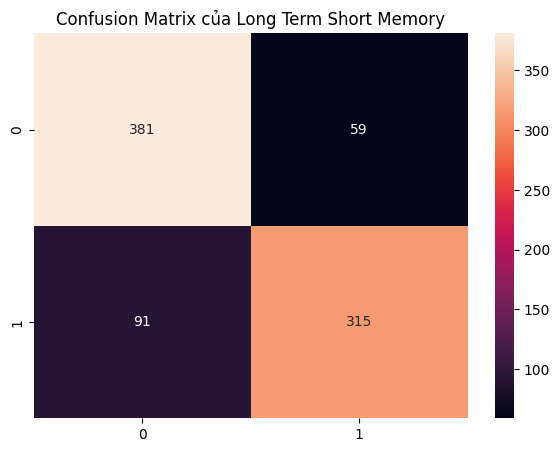

In [44]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm_ltsm, annot=True, fmt='d')
plt.title('Confusion Matrix của Long Term Short Memory')
plt.show()

In [45]:
def predict(tweet):
    test_word = tweet
    tw = tokenizer.texts_to_sequences([test_word])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(ltsm_model.predict(tw).round().item())
    if(prediction==0):
        return('No Disaster')
    else:
        return('Disaster')

In [46]:
predict('Arsonist sets cars ablaze at dealership')

1/1 [==============================] - 0s 292ms/step


'Disaster'

# APPLICATION

In [ ]:
from tkinter import *
import random
win = Tk()

# Tạo hàm predict
def predict_tweet():
    tweet = text_box.get("1.0", "end-1c")
    cleaned_tweet = preprocess(tweet)
    # Dự đoán bằng mô hình Machine Learning
    vectorized_tweet = tfidf_vectorizer.transform([cleaned_tweet])
    prediction_svm = best_svm_classifier.predict(vectorized_tweet)
    prediction_lr = best_lr_classifier.predict(vectorized_tweet)

    # Dự đoán bằng mô hình Deep Learning
    tw = tokenizer.texts_to_sequences([cleaned_tweet])
    tw = pad_sequences(tw, maxlen=200)
    prediction_seq = ltsm_model.predict(tw).round()

    # Dự doán
    total_disaster_predictions = sum([prediction_svm[0], prediction_lr[0], prediction_seq[0]])

    prediction_text_widget.config(state=NORMAL)
    prediction_text_widget.delete("1.0", END)

    prediction_text_widget.insert(END, f"Cleaned text: {cleaned_tweet}\n\n", 'cleaned_text')

    # Trình bày dự đoán
    insert_with_color(prediction_text_widget, "SVM: ", prediction_svm[0])
    insert_with_color(prediction_text_widget, "Logistic Regression: ", prediction_lr[0])
    insert_with_color(prediction_text_widget, "LTSM Model: ", prediction_seq[0])
    aggregated_prediction_str = "Disaster" if total_disaster_predictions >= 2 else "Non-Disaster"
    prediction_text_widget.insert(END, f"\nAggregated Result: {aggregated_prediction_str}\n", 'disaster' if total_disaster_predictions >= 2 else 'non-disaster')

    prediction_text_widget.config(state=DISABLED)

# Tạo hàm để chèn màu
def insert_with_color(widget, label, prediction):
    start_idx = widget.index("end")
    widget.insert(END, label)
    prediction_str = "Disaster" if prediction == 1 else "Non-Disaster"
    widget.insert(END, prediction_str + "\n", 'disaster' if prediction == 1 else 'non-disaster')
    end_idx = widget.index("end")
    widget.tag_add(label.strip(), start_idx, end_idx)
    widget.tag_config('disaster', foreground='red')
    widget.tag_config('non-disaster', foreground='blue')

# Tạo hàm chọn random giá trị trong text
def insert_random_string():
    if 'df_c' in globals() and not df.empty and 'text' in df.columns:
        random_string = random.choice(df_c['text'].tolist())
        text_box.delete("1.0", "end-1c")
        text_box.insert("1.0", random_string)
    else:
        print("DataFrame is not loaded or 'text' column is not available.")

# Tạo nút để gọi hàm random
random_string_button = Button(win, text="Insert Random String", command=insert_random_string)
random_string_button.pack()

# Tạo textbox
text_box = Text(win, height=5, width=40, wrap=WORD)
text_box.pack()

# Tạo nút predict để gọi hàm predict
predict_button = Button(win, text="Predict", command=predict_tweet)
predict_button.pack()

# Tạo result terminal
prediction_text_widget = Text(win, height=8, width=50, wrap=WORD)
prediction_text_widget.pack()

# Chạy hàm
win.mainloop()

1/1 [==============================] - 0s 19ms/step
